<a href="https://colab.research.google.com/github/Zafir-Khan/Internship-Projects/blob/main/Admission_Chances_for_higher_education_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Admission Chances for higher education**

**Chances of Admission using LinearRegression**

**Importing Labraries**

In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


**Import Data**

In [ ]:
adm = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Admission%20Chance.csv')

In [ ]:
adm

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
adm.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
adm.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**Defining (x,y)**

In [ ]:
adm.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
y = adm['Chance of Admit ']
X = adm.drop('Chance of Admit ', axis = 1)

In [ ]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [ ]:
y.shape

(400,)

In [ ]:
X

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [ ]:
X.shape

(400, 8)

**Standardtizing X**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
m = MinMaxScaler()

In [ ]:
X = m.fit_transform(X)

In [ ]:
X

array([[0.        , 0.94      , 0.92857143, ..., 0.875     , 0.91346154,
        1.        ],
       [0.00250627, 0.68      , 0.53571429, ..., 0.875     , 0.66346154,
        1.        ],
       [0.00501253, 0.52      , 0.42857143, ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.99498747, 0.8       , 0.85714286, ..., 0.875     , 0.84935897,
        1.        ],
       [0.99749373, 0.44      , 0.39285714, ..., 0.75      , 0.63461538,
        0.        ],
       [1.        , 0.86      , 0.89285714, ..., 0.75      , 0.91666667,
        1.        ]])

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 8), (120, 8), (280,), (120,))

**Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:

model.fit(X_train,y_train)


LinearRegression()

In [ ]:
model.intercept_

0.32438497218409407

In [ ]:
model.coef_

array([ 0.07211842,  0.1088359 ,  0.11101631,  0.03346508, -0.00320017,
        0.08121316,  0.29800842,  0.01979659])

**Prediction**

In [ ]:

y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0.71638511, 0.75610311, 0.68760789, 0.68124699, 0.56927168,
       0.91423484, 0.90562753, 0.72569757, 0.79088749, 0.59675934,
       0.59489304, 0.80774252, 0.54572472, 0.77132503, 0.8737274 ,
       0.66751677, 0.61934136, 0.67447953, 0.73484064, 0.84425246,
       0.62922545, 0.86090216, 0.82814605, 0.9151533 , 0.68755296,
       0.63544487, 0.6134806 , 0.57723203, 0.51557048, 0.61715529,
       0.52595747, 0.76388331, 0.69695739, 0.75953801, 0.62049587,
       0.53097396, 0.40200383, 0.87065079, 0.92286173, 0.78952969,
       0.71932513, 0.73604218, 0.70278395, 0.90704   , 0.80062706,
       0.81781888, 0.91769447, 0.86667679, 0.58887763, 0.48098577,
       0.62564848, 0.61917228, 0.8041983 , 0.46620308, 0.71182598,
       0.74243792, 0.69141228, 0.63484399, 0.82789223, 0.6680648 ,
       0.64158042, 0.93553342, 0.66537654, 0.65115639, 0.73074156,
       0.69630576, 0.59954454, 0.91516057, 0.57456458, 0.90601273,
       0.5702746 , 0.92658714, 0.62468054, 0.71689836, 0.52505

**Evaluation**

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.07400437276133907

In [ ]:
mean_absolute_error(y_test,y_pred)

0.043087147233558616

**Data Visualization**

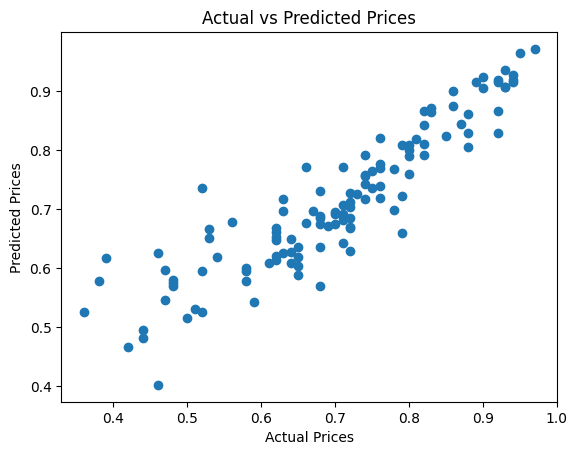

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()